In [90]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [91]:
df = pd.read_csv('../Data-processed/final_data.csv')

In [92]:
df.head()

,N,P,K,pH,temperature,rainfall,crop
0,66.0,46.0,42.0,6.502985,20.879744,202.935536,rice
1,89.0,60.0,45.0,7.038096,21.770462,226.655537,rice
2,87.0,44.0,44.0,7.840207,23.004459,263.964248,rice
3,63.0,38.0,38.0,6.980401,26.491096,242.864034,rice
4,78.0,48.0,35.0,7.628473,20.130175,262.717340,rice


In [93]:
print('size:', df.size)
print('shape:', df.shape)
print('columns:', df.columns)

size: 103208
shape: (14744, 7)
columns: Index(['N', 'P', 'K', 'pH', 'temperature', 'rainfall', 'crop'], dtype='object')


In [94]:
features = df[['N', 'P','K',  'pH']]
target = df['crop']


In [95]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [96]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, target, train_size=0.80, test_size = 0.2,random_state =101)

### DT

In [97]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.94608341810783
              precision    recall  f1-score   support

       apple       0.48      0.74      0.58        19
      banana       0.00      0.00      0.00        22
   blackgram       0.00      0.00      0.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       0.00      0.00      0.00        17
      coffee       1.00      0.71      0.83        17
      cotton       0.46      1.00      0.63        22
      grapes       0.99      0.96      0.97       375
       jowar       0.95      1.00      0.97       365
        jute       0.00      0.00      0.00        14
 kidneybeans       0.19      1.00      0.31        19
      lentil       0.00      0.00      0.00        23
       maize       1.00      0.93      0.97       378
       mango       0.00      0.00      0.00        19
   mothbeans       0.00      0.00      0.00        14
    mungbean       0.00      0.00      0.00        22
   muskmelon       0.00      0.00

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(shuffle=True, n_splits=5)


def cross_val_score_setup(model, features, target):
    return cross_val_score(model, features, target, cv=kf, scoring='accuracy')



In [99]:
# Cross validation score (Decision Tree)

cross_val_score_setup(DecisionTree, features, target)

array([0.89420142, 0.90539166, 0.90844354, 0.90606985, 0.90909091])

In [100]:
import pickle
# Dump the trained Decision tree classifier with Pickle
DT_pkl_filename = '../models/DecisionTree_NPK.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

## GNB

In [101]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9521871820956256
              precision    recall  f1-score   support

       apple       0.41      1.00      0.58        19
      banana       1.00      1.00      1.00        22
   blackgram       0.56      0.64      0.60        22
    chickpea       1.00      1.00      1.00        23
     coconut       0.61      0.82      0.70        17
      coffee       0.89      1.00      0.94        17
      cotton       0.65      1.00      0.79        22
      grapes       0.99      0.93      0.96       375
       jowar       1.00      0.99      1.00       365
        jute       0.58      0.79      0.67        14
 kidneybeans       0.56      1.00      0.72        19
      lentil       0.33      0.39      0.36        23
       maize       1.00      0.93      0.97       378
       mango       0.86      0.63      0.73        19
   mothbeans       0.91      0.71      0.80        14
    mungbean       0.75      0.82      0.78        22
   muskmelon       0.47      0.50 

In [102]:
# Cross validation score (NaiveBayes)
cross_val_score_setup(NaiveBayes,features,target)


array([0.95659546, 0.95829095, 0.96337742, 0.95930824, 0.96166893])

In [103]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = '../models/NBClassifier__NPK.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

## SVM

In [104]:

from sklearn import svm

#Create a svm Classifier
svm_clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm_clf.fit(Xtrain, Ytrain)

#Predict the response for test dataset
Ypred = svm_clf.predict(Xtest)

accuracy = metrics.accuracy_score(Ytest, Ypred)

acc.append(accuracy)
model.append('SVM')

print("Accuracy:" ,accuracy)
print(classification_report(Ytest,predicted_values))


Accuracy: 0.946422516107155
              precision    recall  f1-score   support

       apple       0.41      1.00      0.58        19
      banana       1.00      1.00      1.00        22
   blackgram       0.56      0.64      0.60        22
    chickpea       1.00      1.00      1.00        23
     coconut       0.61      0.82      0.70        17
      coffee       0.89      1.00      0.94        17
      cotton       0.65      1.00      0.79        22
      grapes       0.99      0.93      0.96       375
       jowar       1.00      0.99      1.00       365
        jute       0.58      0.79      0.67        14
 kidneybeans       0.56      1.00      0.72        19
      lentil       0.33      0.39      0.36        23
       maize       1.00      0.93      0.97       378
       mango       0.86      0.63      0.73        19
   mothbeans       0.91      0.71      0.80        14
    mungbean       0.75      0.82      0.78        22
   muskmelon       0.47      0.50      0.48        16

In [105]:
# Cross validation score (SVM)
cross_val_score_setup(svm_clf,features,target)


array([0.95523906, 0.95489997, 0.94811801, 0.95116989, 0.94877883])

In [106]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = '../models/SVM__NPK.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(svm_clf, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

## LG

In [107]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x * 100)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  89.7931502204137
              precision    recall  f1-score   support

       apple       0.34      0.53      0.42        19
      banana       0.47      0.73      0.57        22
   blackgram       0.32      0.55      0.41        22
    chickpea       0.41      0.61      0.49        23
     coconut       0.00      0.00      0.00        17
      coffee       0.82      0.82      0.82        17
      cotton       0.79      0.86      0.83        22
      grapes       0.98      0.93      0.95       375
       jowar       0.86      1.00      0.92       365
        jute       0.00      0.00      0.00        14
 kidneybeans       0.00      0.00      0.00        19
      lentil       0.00      0.00      0.00        23
       maize       0.92      0.93      0.93       378
       mango       0.33      0.32      0.32        19
   mothbeans       0.26      0.43      0.32        14
    mungbean       0.00      0.00      0.00        22
   muskmelon       0.67     

In [108]:
# Cross validation score (Logistic Regression)
cross_val_score_setup(LogReg,features,target)


array([0.88877586, 0.89725331, 0.89962699, 0.89318413, 0.88704206])

In [109]:
import pickle
# Dump the trained Random Forest classifier with Pickle
LR_pkl_filename = '../models/LogisticRegression__NPK.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

## RF

In [110]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x * 100)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  96.40556120718887
              precision    recall  f1-score   support

       apple       0.52      0.79      0.62        19
      banana       1.00      1.00      1.00        22
   blackgram       0.71      0.68      0.70        22
    chickpea       1.00      1.00      1.00        23
     coconut       0.61      0.65      0.63        17
      coffee       1.00      1.00      1.00        17
      cotton       1.00      0.95      0.98        22
      grapes       0.99      0.96      0.98       375
       jowar       1.00      1.00      1.00       365
        jute       0.50      0.57      0.53        14
 kidneybeans       0.63      0.89      0.74        19
      lentil       0.42      0.57      0.48        23
       maize       1.00      1.00      1.00       378
       mango       0.79      0.58      0.67        19
   mothbeans       1.00      0.71      0.83        14
    mungbean       0.85      0.77      0.81        22
   muskmelon       0.61      0.69      0.65 

In [111]:
# Cross validation score (Random Forest)
cross_val_score_setup(RF,features,target)


array([0.96371651, 0.965412  , 0.96710749, 0.96134283, 0.96777476])

In [112]:
import pickle
# Dump the trained Random Forest classifier with Pickle
RF_pkl_filename = '../models/RandomForest_NPK.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

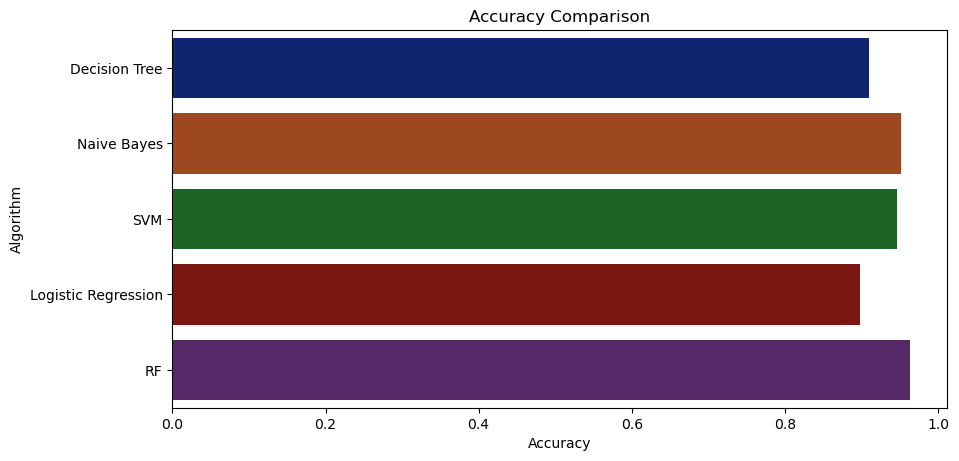

In [113]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [114]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9094608341810784
Naive Bayes --> 0.9521871820956256
SVM --> 0.946422516107155
Logistic Regression --> 0.897931502204137
RF --> 0.9640556120718887


## Making a prediction with RF

In [115]:
data = np.array([[104,18, 30,   6.7 ]])
prediction = RF.predict(data)
print(prediction)

##############################
data = np.array([[83, 45, 60,  7.0]])
prediction = RF.predict(data)
print(prediction)

############################

data = np.array([[82,40 ,30 ,6.7875 ]])
prediction = RF.predict(data)
print(prediction)

['coffee']
['jute']
['coffee']


### Making a prediction with Naive Bayes


In [116]:
data = np.array([[104,18, 30, 6.7]])
prediction = NaiveBayes.predict(data)
print(prediction)

#########################
data = np.array([[83, 45, 60, 7.0 ]])
prediction = NaiveBayes.predict(data)
print(prediction)

#####################333
data = np.array([[82,40 ,30 ,6.7875 ]])
prediction = NaiveBayes.predict(data)
print(prediction)

['coffee']
['papaya']
['coffee']


### Making a prediction with SVM

In [117]:
data = np.array([[104,18, 30, 6.7 ]])
prediction = svm_clf.predict(data)
print(prediction)

#########################
data = np.array([[83, 45, 60, 7.0 ]])
prediction = svm_clf.predict(data)
print(prediction)

#####################
data = np.array([[82,40 ,30 , 6.7875 ]])
prediction = svm_clf.predict(data)
print(prediction)

['coffee']
['jute']
['coffee']
